# Лабораторна робота №4
## з дисципліни "Чисельні методи"

##### За темою: "Чисельні методи розв’язання нелінійних рівнянь і систем нелінійних рівнянь"

##### Виконав: студент групи КА-12 Гавлицький Іван

##### Перевірила: Димитрієва О. А.

##### *Мета роботи:* визначення інтервалу ізоляції коренів нелінійних рівнянь. Придбання практичних навичок в розв’язанні нелінійних алгебричних і трансцендентних рівнянь, побудові ітераційних процесів для наближених формул розв’язання. Визначення похибок обчислення розв’язків нелінійних рівнянь і їх систем.

## Варіант 38

##### 1. Побудувати графік початкової функції $f(x) = 0$ з намаганням обрати інтервал побудови графіку таким чином, щоб можна було спостерігати наявність дійсних коренів. В іншому випадку перетворити функцію штучно так, щоб у неї з’явився хоча б один дійсний корінь. Інформацію про перетворення функції обов’язково подати у звіті з лабораторної роботи. Визначити інтервал ізоляції дійсного кореня початкового або перетвореного рівняння. У разі наявності множини коренів обрати один з них на свій розсуд.

##### 2. Обчислити наближені значення коренів вручну, виконавши 3-4 ітерації (до встановлення факту збіжності) методами, номери яких позначені у табл. 

##### 1) метод простої ітерації; <br> 2) релаксаційний метод; <br> 3) метод Ньютона; <br> 4) метод січних; <br> 5) метод хорд; <br> 6) комбінований метод; <br> 7) метод Мюллера.

##### 3. Скласти програму для розв’язання рівняння з табл. з точністю ε=0.001 позначеними методами. Змінюючи точність обчислень, порівняти кількість ітерацій, яка знадобиться для досягнення вказаної точності.
##### 4. Проаналізувати, як впливає на кількість ітерацій вибір початкового наближення кореня.
##### 5. Скласти програми, у яких ітераційний процесс закінчується по фіксованій кількості ітерацій (наприклад, n=10). Порівняти, як співвідносяться між собою результати, отримані різними методами при одній і тій же кількості ітерацій.

<center> <img src=https://i.imgur.com/YSsO4x1.png> </center>

In [1]:
from sympy import symbols, log, nsolve, diff, lambdify
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    return x * log(x) - 100 

x_symbol = symbols('x')
y_symbol = symbols('y')

func_smbl = func(x_symbol)
func_smbl

x*log(x) - 100

### Перевіримо існування дійсних коренів у даному рівнянні

In [3]:
res = nsolve(func_smbl, 29)
res

29.5365990543293

### Побудуємо графік функції

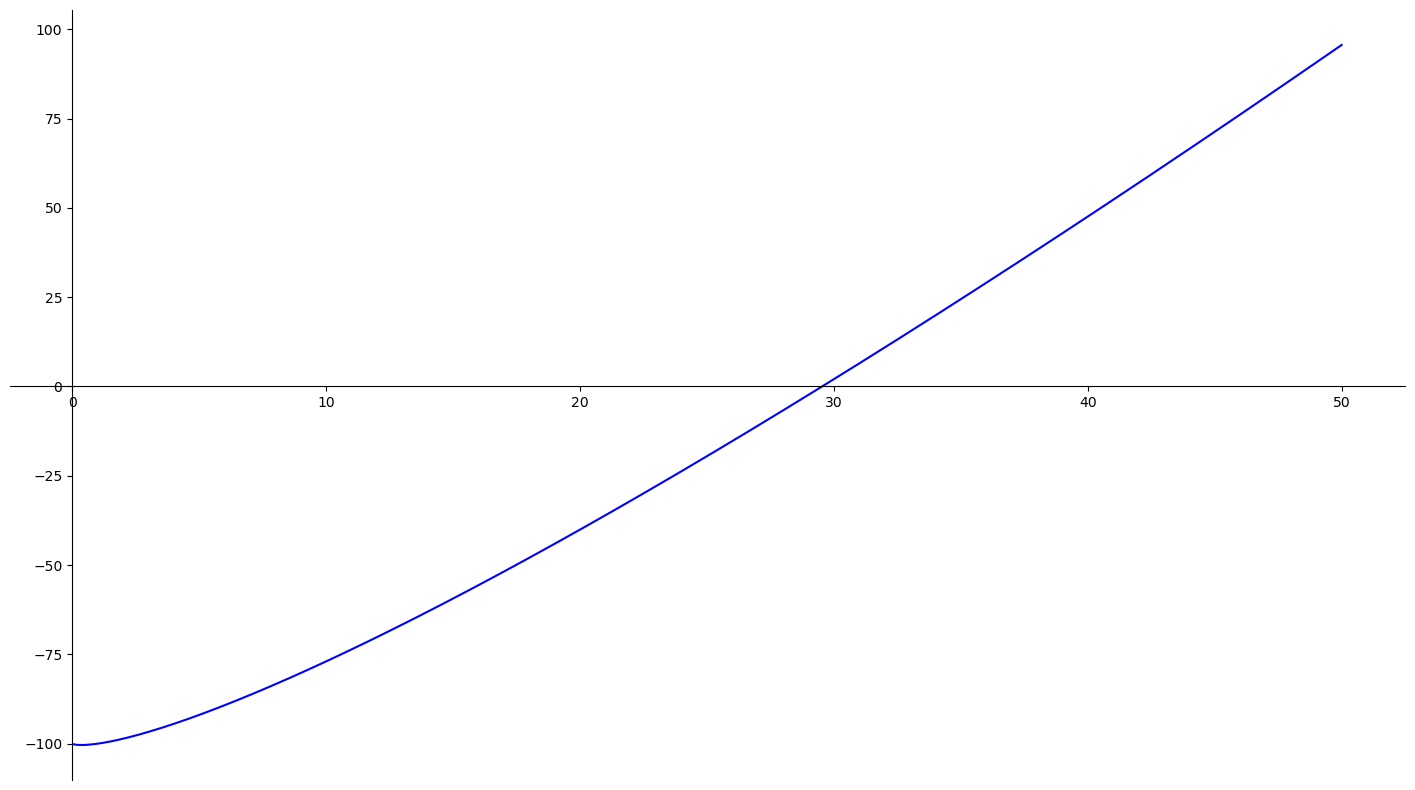

In [4]:
vector_func = np.vectorize(func)
X = np.linspace(0, 50, 1000)
Y = vector_func(X)

graph, ax = plt.subplots(1, 1, figsize = (18, 10))

plt.plot(X, Y, 'b')

ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

##### З графіку видно, що корінь рівняння лежить в околі 30. Розглянемо графік на проміжку $[28, 32]$

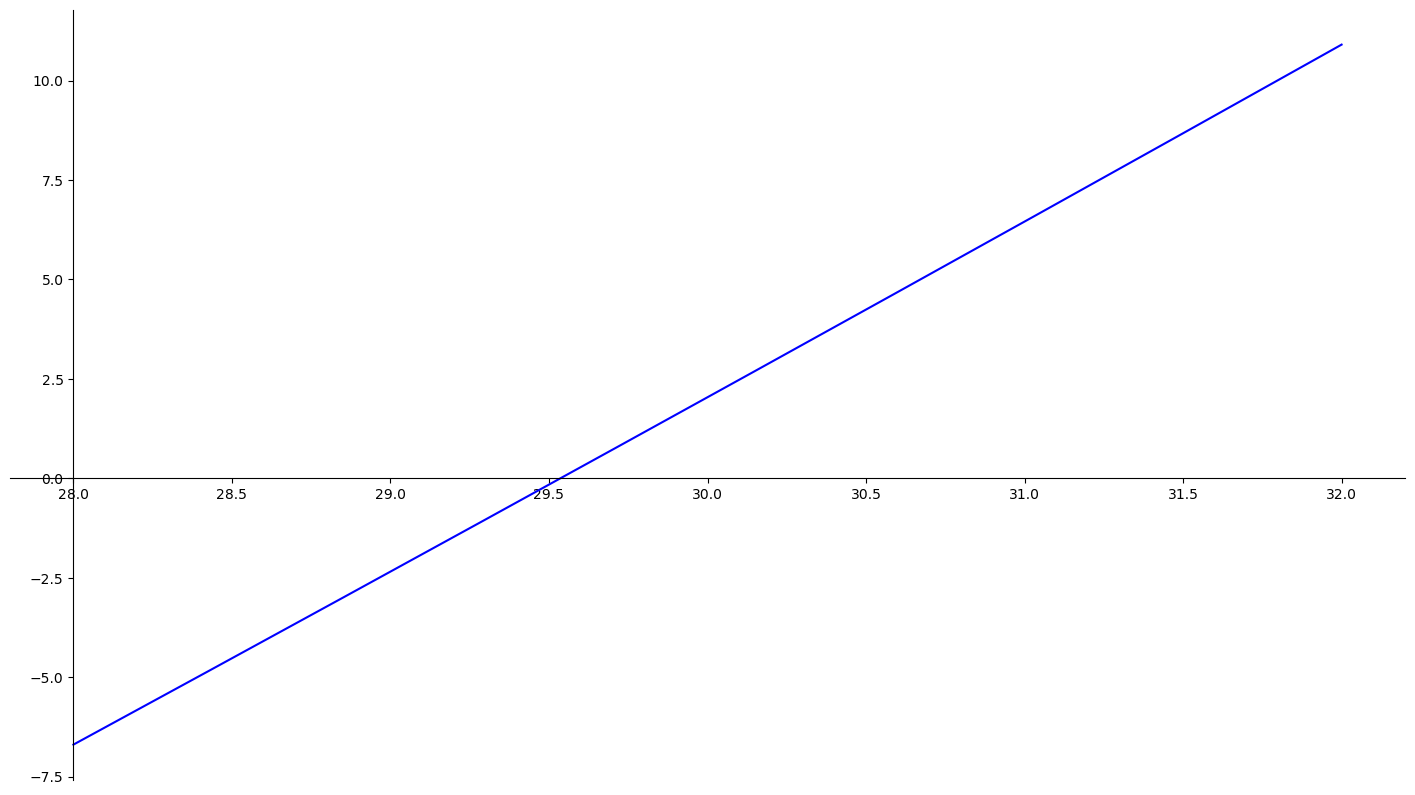

In [5]:
X = np.linspace(28, 32, 1000)
Y = vector_func(X)

graph, ax = plt.subplots(1, 1, figsize = (18, 10))

plt.plot(X, Y, 'b')

ax.spines['left'].set_position(('data', 28))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

### Визначимо інтервал ізоляції кореня

##### Межі інтервалу ізоляції: $ a = 29; b = 30 $. З графіку видно, що $ f(a) < 0 $, а $ f(b) > 0 $, проте проведемо перевірку.

In [6]:
a0 = 29
float(func(a0))

-2.3484209303922534

In [7]:
b0 = 30
float(func(b0))

2.035921449864661

##### Отже, $ [29, 30] $ - інтервал ізоляції кореня

### Метод Ньютона (обчислено вручну)

##### Оберемо значення $x_0$, для цього обчислимо $f(x)*f''(x)$ на кінцях інтервалу ізоляції.

In [8]:
d2_func = diff(func_smbl, x_symbol, 2)
x0_checker = func_smbl * d2_func
x0_checker

(x*log(x) - 100)/x

In [9]:
x0_checker = lambdify(x_symbol, x0_checker)
print(f"f(a)*f''(a) = {x0_checker(a0)}")

f(a)*f''(a) = -0.08098003208249142


In [10]:
print(f"f(b)*f''(b) = {x0_checker(b0)}")

f(b)*f''(b) = 0.06786404832882198


##### Оскільки $f(b)*f''(b) > 0$, покладемо $x_0 = b$.
##### Проведемо 3 ітерації

In [11]:
def newton_step(x_0):
    step = lambdify(x_symbol, func_smbl/diff(func_smbl, x_symbol))
    return float(step(x_0))

In [12]:
x_0 = b0

x_1 = x_0 - newton_step(x_0)
print(x_0)
print(x_1)
print('------------')

x_2 = x_1 - newton_step(x_1)
print(x_1)
print(x_2)
print('------------')

x_3 = x_2 - newton_step(x_2)
print(x_2)
print(x_3)
print('------------')


print('result:')
print('x3 =  %0.15f' % x_3)
print('res = %0.15f' % res)

30
29.537416463449823
------------
29.537416463449823
29.536599056908305
------------
29.536599056908305
29.53659905432934
------------
result:
x3 =  29.536599054329340
res = 29.536599054329336


##### Точне значення кореня: $ x = 29.536599054329336 $, отримане нами - $ x = 29.536599054329340 $. Можемо зробити висновок, що отримане нами значення правильне з точністю до $10^{-13}$.

### Метод хорд
##### Як було визначено вище, $f(b)*f''(b) > 0 \Rightarrow C = b, x_0 = a$

In [13]:
x_0 = a0
C = b0

def chord_method(C, x_0, eps = 0.001, max_iters = 10, mode = 'e'):
    counter = 0
    
    while True:
        counter += 1
        
        x_prev = x_0
        x_0 = x_0 - chord_step(C, x_0)
        dx = abs(x_0 - x_prev)

        print(f'x{counter} = {x_0}')
        
        if break_condition(dx, counter, eps, max_iters, mode):
            break

    return x_0, counter


def chord_step(C, x_n):
    return float(func(x_n) * (x_n - C) / (func(x_n) - func(C)))


def break_condition(dx, counter, eps, max_iters, mode):
    return (mode == 'e' and dx < eps) or (mode == 'i' and counter == max_iters)

##### За допомогою цього методу порахуємо значення кореня з точністю $ \varepsilon = 0.001 $.

In [14]:
chord_method(C, x_0)

x1 = 29.535638124651808
x2 = 29.536597347457963


(29.536597347457963, 2)

##### За допомогою цього методу порахуємо значення кореня з точністю $ \varepsilon = 10^{-6} $.

In [15]:
chord_method(C, x_0, eps=0.000001)

x1 = 29.535638124651808
x2 = 29.536597347457963
x3 = 29.536599051297515
x4 = 29.536599054323954


(29.536599054323954, 4)

##### За допомогою цього методу порахуємо значення кореня з точністю $ \varepsilon = 10^{-10} $.

In [16]:
chord_method(C, x_0, eps=0.0000000001)

x1 = 29.535638124651808
x2 = 29.536597347457963
x3 = 29.536599051297515
x4 = 29.536599054323954
x5 = 29.536599054329326


(29.536599054329326, 5)

##### Можемо зробити висновок, що кількість ітерацій суттєво не змінюється в залежності від бажаної точності. До того ж, за однакову кількість ітерацій метод Ньютона досягає значно більшої точності, порівняно з методом хорд.

### Метод простої ітерації
##### Приведемо рівняння $f(x) = 0$ до канонічного вигляду $x = \phi (x)$

In [17]:
def phi(x):
    return 100/log(x)

phi_smbl = phi(x_symbol)
phi_smbl

100/log(x)

In [18]:
def simple_iteration_method(x_0, eps = 0.001, max_iters = 10, mode = 'e'):
    counter = 0
    
    while True:
        counter += 1
        
        x_prev = x_0
        x_0 = float(phi(x_0))
        dx = abs(x_0 - x_prev)

        print(f'x{counter} = {x_0}')
        
        if break_condition(dx, counter, eps, max_iters, mode):
            break

    return x_0, counter


def break_condition(dx, counter, eps, max_iters, mode):
    return (mode == 'e' and dx < eps) or (mode == 'i' and counter == max_iters)

##### За допомогою цього методу порахуємо значення кореня з точністю $ \varepsilon = 0.001 $.
##### Покладемо $x_0 = a$

In [19]:
simple_iteration_method(a0)

x1 = 29.69742043733701
x2 = 29.489302593820803
x3 = 29.550586637901223
x4 = 29.532469153342667
x5 = 29.537819022300464
x6 = 29.53623872911828
x7 = 29.53670548317489


(29.53670548317489, 7)

##### За допомогою цього методу порахуємо значення кореня з точністю $ \varepsilon = 10^{-6} $.

In [20]:
simple_iteration_method(a0, eps=0.000001)

x1 = 29.69742043733701
x2 = 29.489302593820803
x3 = 29.550586637901223
x4 = 29.532469153342667
x5 = 29.537819022300464
x6 = 29.53623872911828
x7 = 29.53670548317489
x8 = 29.536567618958042
x9 = 29.536608339276782
x10 = 29.53659631187232
x11 = 29.53659986435793
x12 = 29.536598815074445
x13 = 29.5365991249971


(29.5365991249971, 13)

##### За допомогою цього методу порахуємо значення кореня з точністю $ \varepsilon = 10^{-10} $.

In [21]:
simple_iteration_method(a0, eps=0.0000000001)

x1 = 29.69742043733701
x2 = 29.489302593820803
x3 = 29.550586637901223
x4 = 29.532469153342667
x5 = 29.537819022300464
x6 = 29.53623872911828
x7 = 29.53670548317489
x8 = 29.536567618958042
x9 = 29.536608339276782
x10 = 29.53659631187232
x11 = 29.53659986435793
x12 = 29.536598815074445
x13 = 29.5365991249971
x14 = 29.536599033456483
x15 = 29.536599060494474
x16 = 29.536599052508368
x17 = 29.536599054867192
x18 = 29.536599054170477
x19 = 29.53659905437626
x20 = 29.53659905431548


(29.53659905431548, 20)

##### З розрахунків можна помітити, що необхідна точність досягається більшою кількістю ітерацій, ніж методом хорд. 

### Порівняємо результати при однаковій кількості ітерацій
##### Код написаних функцій для методів хорд і простих ітерацій передбачає режим, у якому користувач зможе заздалегідь визначити граничну кількість ітерацій для розрахунків.
##### Спираючись на досвід попередніх розрахунків, збільшимо інтервал ізоляції кореня аби більш наочно порівняти методи.
##### Для початку перевіримо точність для 5 ітерацій.
##### Метод хорд:

In [22]:
x_0 = a0 = 25
C = b0 = 35
chord_method(C, x_0, max_iters=5, mode='i')
print(f"Точний розв'язок: {res}")

x1 = 29.441709794107975
x2 = 29.53474537460517
x3 = 29.536562891334974
x4 = 29.53659834885277
x5 = 29.536599040566735
Точний розв'язок: 29.5365990543293


##### Метод простої ітерації:

In [23]:
simple_iteration_method(a0, max_iters=5, mode='i')
print(f"Точний розв'язок: {res}")

x1 = 31.06674672798059
x2 = 29.10243992122413
x3 = 29.666354231403318
x4 = 29.498407171633673
x5 = 29.54789125247862
Точний розв'язок: 29.5365990543293


##### Точне значення кореня: $ x = 29.5365990543293 $, метод хорд має точність до 7 знаку після коми, простої ітерації - 1.

##### Проведемо експеримент із 10 ітераціями.
##### Метод хорд:

In [24]:
chord_method(C, x_0, max_iters=10, mode='i')
print(f"Точний розв'язок: {res}")

x1 = 29.441709794107975
x2 = 29.53474537460517
x3 = 29.536562891334974
x4 = 29.53659834885277
x5 = 29.536599040566735
x6 = 29.536599054060854
x7 = 29.536599054324103
x8 = 29.536599054329233
x9 = 29.536599054329336
x10 = 29.536599054329336
Точний розв'язок: 29.5365990543293


##### Метод простої ітерації:

In [25]:
simple_iteration_method(a0, max_iters=10, mode='i')
print(f"Точний розв'язок: {res}")

x1 = 31.06674672798059
x2 = 29.10243992122413
x3 = 29.666354231403318
x4 = 29.498407171633673
x5 = 29.54789125247862
x6 = 29.53326473688958
x7 = 29.537583986737893
x8 = 29.536308146508418
x9 = 29.536684979279126
x10 = 29.536573675080152
Точний розв'язок: 29.5365990543293


##### Отримали точність: <br> Метод хорд - більше 15 знаків; <br> Метод простої ітерації - 4.

##### Отже, метод хорд збігається значно швидше за простої ітерації.

## Висновки

##### Під час виконання роботи я навчився визначати інтервали ізоляції коренів нелінійних рівнянь. Придбав практичні навички в розв’язанні нелінійних алгебричних і трансцендентних рівнянь, побудові ітераційних процесів для наближених формул розв’язання.